# Project 8

In addition to answering the bolded questions on Coursera, also attach your notebook, both as
`.ipynb` and `.html`.

You are the founder of a company that is looking to enter two new industries: the auto industry and the food industry. To compare the projects, your investors would like to see MVPs (Minimum Viable Products) (click [here](https://en.wikipedia.org/wiki/Minimum_viable_product) for more info) for each. You must, in one week’s time, prove that the machine learning capabilities work in both projects. Using your extensive knowledge of data science, you decide that the best model for both projects is SVM (Support Vector Machines). Therefore, you must fit SVMs for both projects and demonstrate their efficacy.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Set Up
Meet our old friend - PennGrader! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [1]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 41075576                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Chris Stewart"     # YOUR FULL NAME GOES HERE

In [2]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW8', student_id = STUDENT_ID)

In [3]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#SVM
from sklearn.svm import SVR, SVC

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import scale

## Part A: The Auto Business

Understanding the data is vital in any study, as we do not want to mix up categorial with numerial data.

This dataset has 9 variables:
    
| Variable | Description |
| --- | --- | 
| <b> mpg </b> | miles per gallon |
| <b> cylinders </b> | Number of cylinders between 4 and 8 |
| <b> displacement </b> | Engine displacement (cu. inches) |
| <b> horsepower </b> | Engine horsepower |
| <b> weight </b> | Vehicle weight (lbs.) |
| <b> acceleration </b> | Time to accelerate from 0 to 60 mph (sec.) |
| <b> year </b> | Model year (modulo 100) |
| <b> origin </b> | Origin of car (1. American, 2. European, 3. Japanese) |
| <b> name </b> | Vehicle name |

In [4]:
data = pd.read_csv('Auto.csv').copy() #import 

1. <b>What is the range of ‘year’?</b> Storre your solution in `yr_range` as (min_year, max_year)

In [85]:
yr_range = (data['year'].min(), data['year'].max())
print(yr_range)

(70, 82)


In [6]:
grader.grade(test_case_id = 'test_year_range', answer = yr_range)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Create a binary output variable that takes on a $1$ for cars with gas mileage above the median, and a $0$ for cars with gas mileage below the median. Name this column `above_median`, append this column to your `data` dataframe.

In [86]:
above_median = (data['mpg'] > data['mpg'].median()).astype(int)
data['above_median'] = above_median
data['mpg'].median()

22.75

In [8]:
grader.grade(test_case_id = 'test_ab_median', answer = above_median)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Fit a Support Vector Classiﬁer to the data with the default total slack budget (cost value), $C$ of $1.0$ and a <b>linear kernel</b>, in order to predict whether a car gets high or low gas mileage (i.e., the binary variable from Step 2). Find the accuracy of your model using one trial of 5-fold cross validation with `random_state=22`. Comment on your results and back up your assertions with plots. Store the test accuracy score using 5-fold cross validation in `k_fold_accuracy`.

*Hint*: Do not use 'name' or 'mpg' as predictors. Also remember to standardize your data using `sklearn.preprocessing.scale` before employing SVC. To calculate the accuracy of your model, use the <b>averaged</b> `cross_val_score`. 

In [12]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) #returns a contiguous flattened array
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [13]:
X = (scale(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]))
y = data['above_median']

In [14]:
cv_method = KFold(n_splits = 5,shuffle=True,  random_state = 22)
model = SVC(C=1, kernel = 'linear')
k_fold_accuracy = np.mean(cross_val_score(model, X, y, cv = cv_method, scoring = 'accuracy'))

k_fold_accuracy

0.8979227523531321

In [15]:
model.fit(X, y)


SVC(C=1, kernel='linear')

In [16]:
plot_svc(model, X, y)

ValueError: X.shape[1] = 2 should be equal to 7, the number of features at training time

In [17]:
grader.grade(test_case_id = 'test_SVC', answer = k_fold_accuracy)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Fit a Support Vector Classiﬁer to the data with total slack budget (cost values), $C$ of $\{0.001, 0.01, 0.1, 1\}$ in order to predict whether a car gets high or low gas mileage. Report the accuracy of your model using 10 trials of 5-fold cross validation with `random_state=trial` (the trial number currently running in the for-loop) and `gamma='auto'` for each of the cost values. Create a variable named `accuracies` which contains the mean accuracy of each of your four cost values. Comment on your results and back up your assertions with plots. Store the best-performing $C$ in `C_best`

In [18]:
#Vary the cost value for linear SVC
cost_values = [0.001, 0.01, 0.1, 1] #Try these for now, add different values if time allots
C_best = 0  # Enter a number
accuracies = []

for c in cost_values:
    k_accs = []
    for trial in range(10):
        cv_method = KFold(n_splits = 5,shuffle=True,  random_state = trial)
        model = SVC(C=c, kernel = 'linear', gamma='auto')
        accuracy = np.mean(cross_val_score(model, X, y, cv = cv_method, scoring = 'accuracy'))
        k_accs.append(accuracy)
    mean_acc = np.mean(k_accs)
    accuracies.append(mean_acc)
    if mean_acc == max(accuracies):
        C_best = c


print(accuracies)
print(C_best)

[0.8607108081791626, 0.9104576436222006, 0.9051152223304122, 0.9071697500811424]
0.01


In [19]:
grader.grade(test_case_id = 'test_SVC_tune', answer = (accuracies, C_best))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Repeat the process in Part A Step 4, this time using SVMs with radial (rbf) basis kernels, with diﬀerent values of gamma, and cost. Store your best-performing parameters in `radial_best_params`; store your test accuracy using best performing parameters in`radial_score`. Use the following parameters for your search:

    - Slack budget/Cost value:  {0.001,0.01,0.1,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,10} 
    - Gamma:  {0.001,0.025,0.05,0.075,0.1,0.125,0.15,0.2,1} 
    - Cross validation: 5-fold
    - Scoring: ‘accuracy’
    - kernel: 'rbf'

*Hint*: Familiarize yourself with GridSearchCV. Because tuning non-linear SVMs take a long time, GridSearchCV will efficiently tune these parameters for your model. 

In [20]:
Cs = [0.001, 0.01, 0.1, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10]
gammas = [0.001, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

In [23]:
model = SVC(C=c, kernel = 'rbf', gamma=gammas)
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the GridSearchCV to the data
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
radial_best_params = grid_search.best_params_
radial_score = grid_search.score(X, y)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.05}


In [24]:
grader.grade(test_case_id = 'test_radial_gsCV', answer = (radial_best_params, radial_score))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Similar with question 5, but this time use a polynomial('poly') kernel instead. Store the best-performing parameters and test accuracy within `poly_best_params` and `poly_score`. Use the following parameters for your search:

    - Slack budget/Cost value:  {0.001,0.01,0.1,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,10} 
    - Gamma:  {0.001,0.025,0.05,0.075,0.1,0.125,0.15,0.2,1} 
    - Degree:  {0.5,1,2,3,4,5} , only used for polynomial kernel
    - Cross validation: 5-fold
    - Scoring: ‘accuracy’
    - kernel: 'poly'

In [89]:
Cs = [0.001, 0.01, 0.1, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10]
gammas = [0.001, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 1]
degrees = [0.5, 1, 2, 3, 4, 5]

In [90]:
param_grid = {'C': Cs, 'gamma' : gammas, 'degree': degrees}

model = SVC(kernel='poly')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'accuracy')  # 5-fold cross-validation

# Fit the GridSearchCV to the data
grid_search.fit(X, y)
poly_best_params = grid_search.best_params_
poly_score = grid_search.score(X, y)




In [91]:
print(poly_best_params)

{'C': 0.1, 'degree': 1, 'gamma': 0.075}


In [92]:
grader.grade(test_case_id = 'test_poly_gsCV', answer = (poly_best_params, poly_score))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


8. Comment on your overall observations. Would this MVP be satisfactory for your investors?

In [ ]:
raise notImplementedError

## Part B: The Food Business

Your second idea is an app that classifies images: SeeFood. For your MVP, you decide to show your Silicon Valley investors an app that classifies food images as ‘hot dog’ or ‘not hot dog’—an \$8 million opportunity indeed<sup>1</sup>. To build this app, you have collected the following sample food images from the Food101 dataset:

- 325 training images labeled  'hot dog'
- 300 training images labeled  'not hot dog'
- 40 test images labeled  'hot dog'
- 35 test images labeled  'not hot dog'

Your goal is to build a model that correctly labels the test images. From your experience working on the Auto MVP, you decide to use a polynomial SVM model for this project; however, due to time limitations, you decide not to tune your SVM.

<sup>1</sup> To read about the data science behind how the show Silicon Valley built this app, read [this Medium article](https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3).

1. Using the `get_data()` method below, first convert the image data into `Numpy` arrays.

If the below cell fails, enter the code (without !) into the codio terminal

In [ ]:
!pip install Pillow --user

In [95]:
import os
from PIL import Image
def get_data(dir):
    
    images = []
    data = []

    categories = ['not_hot_dog', 'hot_dog']
    for category in categories:
        path = os.path.join(dir, category) # Parse the path
        label = categories.index(category) # 1 for hot_dog

        for file in os.listdir(path): # For each image
            filepath = os.path.join(path, file)
            img = Image.open(filepath)
            resized_img = img.resize((100,100), Image.ANTIALIAS) # Resize to 100x100
            img_array = np.array(resized_img).flatten() # Flatten the array to 1D
            data.append([img_array, label]) # Append the image's array with its label
            images.append(resized_img) # Save the images so they can be opened later
    
    return data, images

In [96]:
train_data, train_images = get_data("hot_dog_dataset/hot_dog_dataset/train")
X_train, y_train = list(zip(*train_data))

test_data, test_images = get_data("hot_dog_dataset/hot_dog_dataset/test")
X_test, y_test = list(zip(*test_data))




In [97]:
grader.grade(test_case_id = 'test_train', answer = (len(X_train), len(X_train[0])))

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [98]:
grader.grade(test_case_id = 'test_test', answer = (len(X_test), len(X_test[0])))

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Standardize `X_train` and `X_test` using `sklearn.preprocessing.scale`, in preparation for applying SVM. Hint: Scale each image individually.

In [99]:
X_train = scale(X_train, axis=1, copy=False)
X_test = scale(X_test, axis=1, copy=False)

In [100]:
grader.grade(test_case_id = 'test_scale', answer = (np.sum(X_train[:10]), np.sum(X_test[:10])))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Fit a polynomial SVM on your training data with all default parameters. Report the accuracy of the model as `training_accuracy` and `test_accuracy`. Define the predicted values as `y_pred_train` and `y_pred_test`. 

In [101]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

training_accuracy = accuracy_score(model.predict(X_train), y_train)
test_accuracy = accuracy_score(model.predict(X_test), y_test)

print(training_accuracy)
print(test_accuracy)

1.0
0.6133333333333333


In [102]:
grader.grade(test_case_id = 'test_SVC2', answer = (training_accuracy, test_accuracy))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. What are the confusion matrices for both the training set and the test set, store them in `train_confusion` and `test_confusion`? What is the True Positive Rate for the test set, store your answer in `TP_test`?

In [103]:
train_confusion = confusion_matrix(y_train, model.predict(X_train))
train_confusion

array([[300,   0],
       [  0, 325]])

In [104]:
grader.grade(test_case_id = 'test_train_confu', answer = train_confusion)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [105]:
test_confusion = confusion_matrix(y_test, model.predict(X_test))
TP_test = test_confusion[1,1] / (test_confusion[1,1] + test_confusion[1,0])
print(test_confusion)
print(TP_test)

[[14 21]
 [ 8 32]]
0.8


In [106]:
grader.grade(test_case_id = 'test_test_score', answer = (test_confusion, TP_test))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Plot the ROC curve for your model using the `plot_roc()` method below. Comment on your observations. 

In [45]:
def plot_roc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

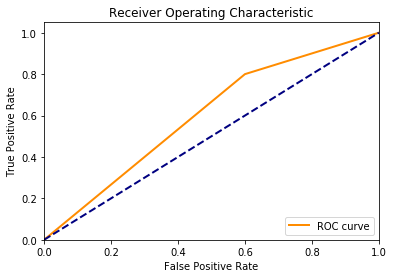

(array([0. , 0.6, 1. ]), array([0. , 0.8, 1. ]), array([2, 1, 0]))

In [46]:
plot_roc(model, X_train, y_train, X_test, y_test)

In [47]:
print("""
Looks like max area under the curve for TPR of 0.8 and FPR of 0.6.

""")


Looks like max area under the curve for TPR of 0.8 and FPR of 0.6.




6. Encode the predicated values as ‘hot_dog’ for ‘1’ and ‘not_hot_dog’ for ‘0’. Using the show_images() method below, show your results for both your training set and your test set, with the title of each image being your predicted value. Comment on your results.

In [52]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [53]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [57]:
y_pred_train_encoded = list(map(lambda x: 'hot_dog' if x == 1 else 'not_hot_dog', y_pred_train))
y_pred_test_encoded = list(map(lambda x: 'hot_dog' if x == 1 else 'not_hot_dog', y_pred_test))

In [58]:
def show_images(image_array, labels):
    
    import matplotlib.pyplot as plt
    from matplotlib import gridspec

    size = len(image_array)
    index = 1
    fig = plt.figure(figsize=(20,100))
    
    for image in image_array:
        fig.add_subplot(int(size/5), 5, index)
        plt.imshow(image)
        plt.title(labels[index-1])
        plt.axis('off')
        index += 1
    plt.show()

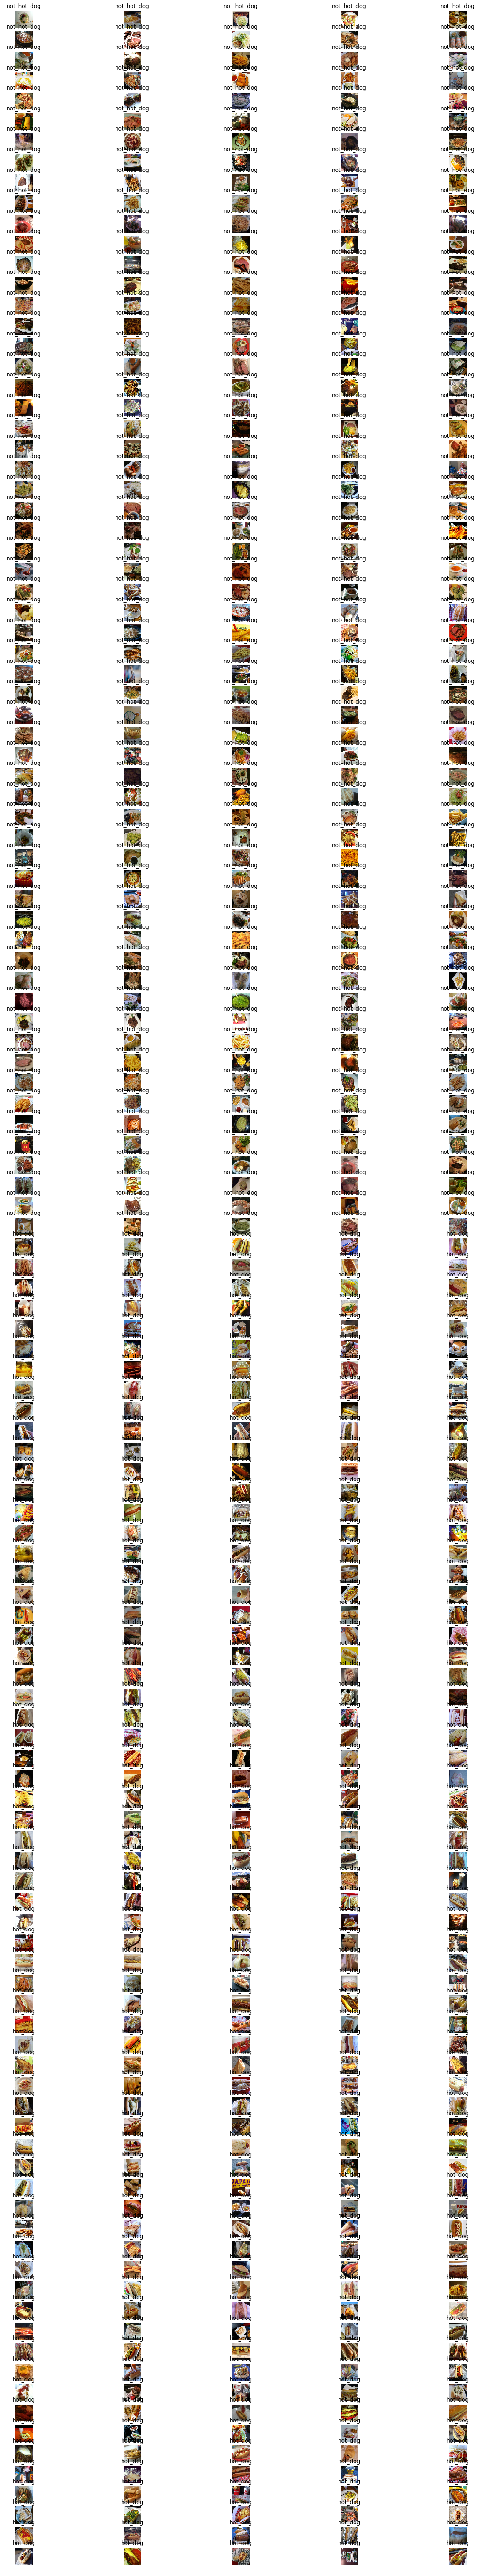

In [59]:
show_images(train_images, y_pred_train_encoded)

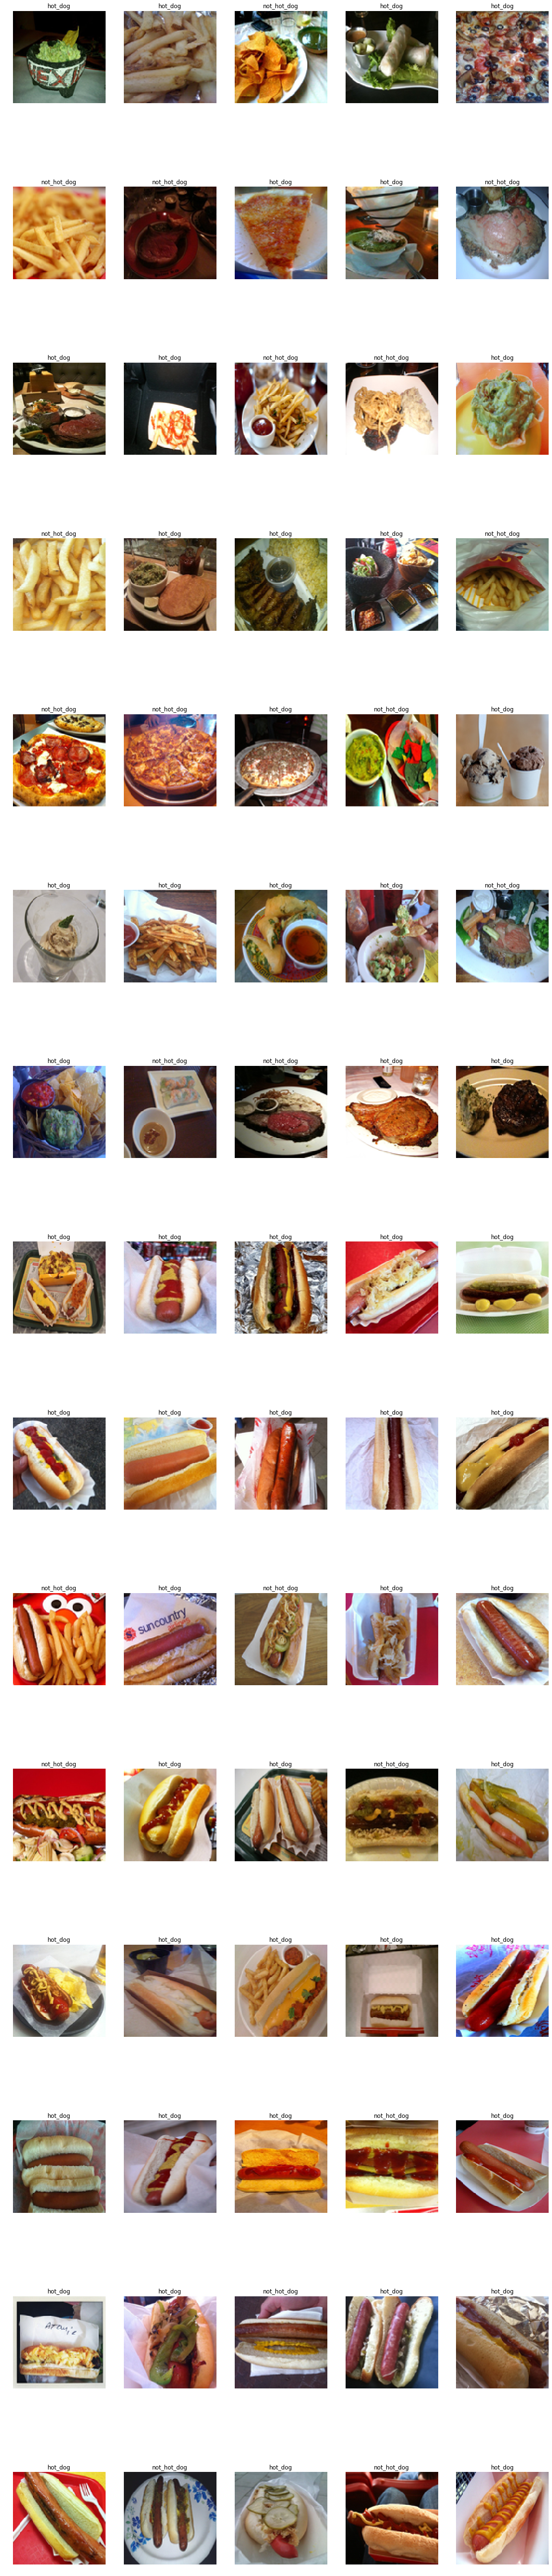

In [60]:
show_images(test_images, y_pred_test_encoded)

In [61]:
# Comment on your observations

print("It doesn't seem to be working particularly well. I think it is basing a lot of its decisions on color and misclassifying a lot of dark hot dogs as not hot dogs")

It doesn't seem to be working particularly well. I think it is basing a lot of its decisions on color and misclassifying a lot of dark hot dogs as not hot dogs


There are many methods used to simplify images; to improve our classification, we are going to explore one of the feature descriptors used commonly in computer vision and image processing for object detection. Histogram of oriented gradients, or HOG, is a feature descriptor often used to extract features from image data. It works similarly to edge detection, with an added dimension of being able to detect edge directions. The image is broken down into ‘localized’ regions and the gradients and orientation are calculated. The actual implementation of the calculations can be found online; for the purpose of this analysis, we are just going to utilize prebuilt functions to aid our classification.

The code below takes in an image filepath and generates both the original image, as well as the hog image.

You may need to install `skimage`:

```
pip install scikit-image --user
```

In [62]:
def hogimage_example(filepath):
    try:
        import skimage
        from skimage import io
        import matplotlib.pyplot as plt
        from skimage.color import rgb2gray
        from skimage.transform import resize
        from skimage.feature import hog
    except Exception:
        print("Need to install packages")

    img = io.imread(filepath) # Read in image
    grayscale = rgb2gray(img) # Convert to grayscale to flatten to 1D
    image_resized = resize(grayscale, (100,100),anti_aliasing=True) #Resize to 100x100

    hog_features, hog_image = hog(image_resized,
                                  visualize=True,
                                  block_norm='L2-Hys',
                                  pixels_per_cell=(16, 16)) # Generate hog features as well as the image
    plt.figure()
    plt.imshow(img) # Show the original image
    plt.figure()
    plt.imshow(hog_image,cmap='gray') #Show the transformed image


7. Use the relevant parts of the above example syntax to modify the previous `get_data()` function to store the hog_features of each image. Remeber to tandardize `X_train` and `X_test` using `sklearn.preprocessing.scale`, in preparation for applying SVM. Hint: Scale each image individually.

*Hint*: Don't forget to import necessary packages! Your function should return (\[list of features, labels\], flattened_images)

In [65]:
    try:
        import skimage
        from skimage import io
        import matplotlib.pyplot as plt
        from skimage.color import rgb2gray
        from skimage.transform import resize
        from skimage.feature import hog
    except Exception:
        print("Need to install packages")

In [77]:
# Import necessary packages 

# Define your function
def get_hog_data(dir):
    
    images = []
    data = []

    categories = ['not_hot_dog', 'hot_dog']
    for category in categories:
        path = os.path.join(dir, category) # Parse the path
        label = categories.index(category) # 1 for hot_dog

        for file in os.listdir(path): # For each image
            filepath = os.path.join(path, file)
            
            img = io.imread(filepath) # Read in image
            grayscale = rgb2gray(img) # Convert to grayscale to flatten to 1D
            image_resized = resize(grayscale, (100,100),anti_aliasing=True) #Resize to 100x100
            
            hog_features, hog_image = hog(image_resized,
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16)) # Generate hog features as well as the image
            
            data.append([hog_features, label]) # Append the image's array with its label
            images.append(hog_image) # Save the images so they can be opened later
    
    return data, images

In [80]:
train_data, train_images = get_hog_data("hot_dog_dataset/hot_dog_dataset/train")
X_train, y_train = list(zip(*train_data))

test_data, test_images = get_hog_data("hot_dog_dataset/hot_dog_dataset/test")
X_test, y_test = list(zip(*test_data))

X_train = scale(X_train, axis=1, copy=False)
X_test = scale(X_test, axis=1, copy=False)

/home/codio/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/codio/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))
/home/codio/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))


In [81]:
grader.grade(test_case_id = 'test_hog_data', answer = (X_train[0], X_test[0]))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


8. Repeat the previous SVM steps, except now using hog_features. What is the new training and test accuracy? Report the accuracy of the model as `hog_training_accuracy` and `hog_test_accuracy`. Set `random_state=22`.

In [82]:
model2 = SVC(kernel = 'poly')
model2.fit(X_train, y_train)

hog_training_accuracy = accuracy_score(model2.predict(X_train), y_train)
hog_test_accuracy = accuracy_score(model2.predict(X_test), y_test)

In [83]:
grader.grade(test_case_id = 'test_SVC_hog', answer = (hog_training_accuracy, hog_test_accuracy))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


This part is not graded. Plot ROC curve using `plot_roc()` function given above. Similar with question B.6, label your testing set and show testing set images using `show_image()`. How the model built from hog_features differ from the previous model? Comment on your results.

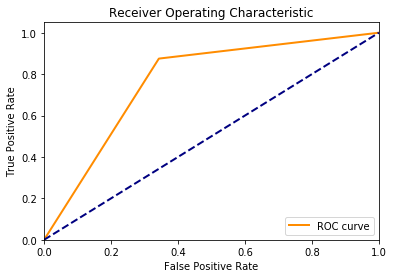

(array([0.        , 0.34285714, 1.        ]),
 array([0.   , 0.875, 1.   ]),
 array([2, 1, 0]))

In [84]:
plot_roc(model, X_train, y_train, X_test, y_test)

In real life applications, it is helpful to explore and learn how to implement existing packages that can be used to aid in analysis. There exist other methods of image simplification that can be explored.

## Part C: The One Billion Dollar Decision

The following questions are optional and ungraded, but are interesting to think about: 

1. Which of the two projects should your company pursue? Why?
2. Constant iteration is needed for a product to improve. How would you improve upon these projects in preparation for the launch of your startup?
3. Pitch your company to investors. What is unique about your project(s)? Did you use any special preprocessing methods or models?